In [43]:
import numpy as np
import pandas as pd
import seaborn as sns 

import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.plotly as py

% matplotlib inline

In [44]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [21]:
print __version__

2.4.1


In [22]:
import cufflinks as cf

In [23]:
init_notebook_mode(connected=True)

In [24]:
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [47]:
sem3_2017 = '../../../Cleaned-Data/2017-Passouts/Sem-3_2017_Passout_cleaned.xlsx'
sem4_2017 = '../../../Cleaned-Data/2017-Passouts/Sem-4_2017_Passout_cleaned.xlsx'
sem5_2017 = '../../../Cleaned-Data/2017-Passouts/Sem-5_2017_Passout_cleaned.xlsx'
sem6_2017 = '../../../Cleaned-Data/2017-Passouts/Sem-6_2017_Passout_cleaned.xlsx'
merged_2017 = '../../../Cleaned-Data/2017-Passouts/2017_merged.xlsx'
company_2017 = '../../../Cleaned-Data/2017-Passouts/2017.xlsx'

In [49]:
sem3 = pd.read_excel(sem3_2017)
sem4 = pd.read_excel(sem4_2017)
sem5 = pd.read_excel(sem5_2017)
sem6 = pd.read_excel(sem6_2017)
merged = pd.read_excel(merged_2017)
company = pd.read_excel(company_2017)

In [41]:
M3 = merged['M3-TH']
M4 = merged['M4-TH']
company = merged['Company 0/1']
GPA = merged['GPA']
Name = merged['Name']
Company = merged['Company 0/1']
trace1 = go.Scatter(
    y = GPA,
    x = Name,
    mode = 'markers'
)

trace2= go.Scatter(
    y = Company,
    mode = 'markers'
)
data = [trace1, trace2]
py.iplot(data, filename='basic-scatter')

#merged.iplot(kind="scatter",x="M3-TH",y="M4-TH",mode="markers",size=10)

# Sem 3 Correaltions 

In [54]:
sem3_2017_merge = pd.merge(sem3, company, how='left')
sem3_2017_merge['Company'].loc[~sem3_2017_merge['Company'].isnull()] = 1
sem3_2017_merge['Company'].loc[sem3_2017_merge['Company'].isnull()] = 0
sem3_2017_merge.head(2)

,Name,Gender,Sno,M3-TH,M3-IA,M3-TW,DIS-TH,DIS-IA,OOPM-TH,OOPM-IA,...,DS-IA,DS-TW,DS-PR,DLDA-TH,DLDA-IA,DLDA-TW,P/F,GPA,Company,Package
0,AGRE KIRAN SHASHIKANT,0,243201,78,19,20,67,19,56,20,...,19,24,24,67,16,23,P,9.29,1,350000.0
1,AGRAWAL CHANCHAL RAKESH,1,243202,32,15,21,38,17,56,18,...,15,22,22,50,11,21,P,7.11,0,NaN


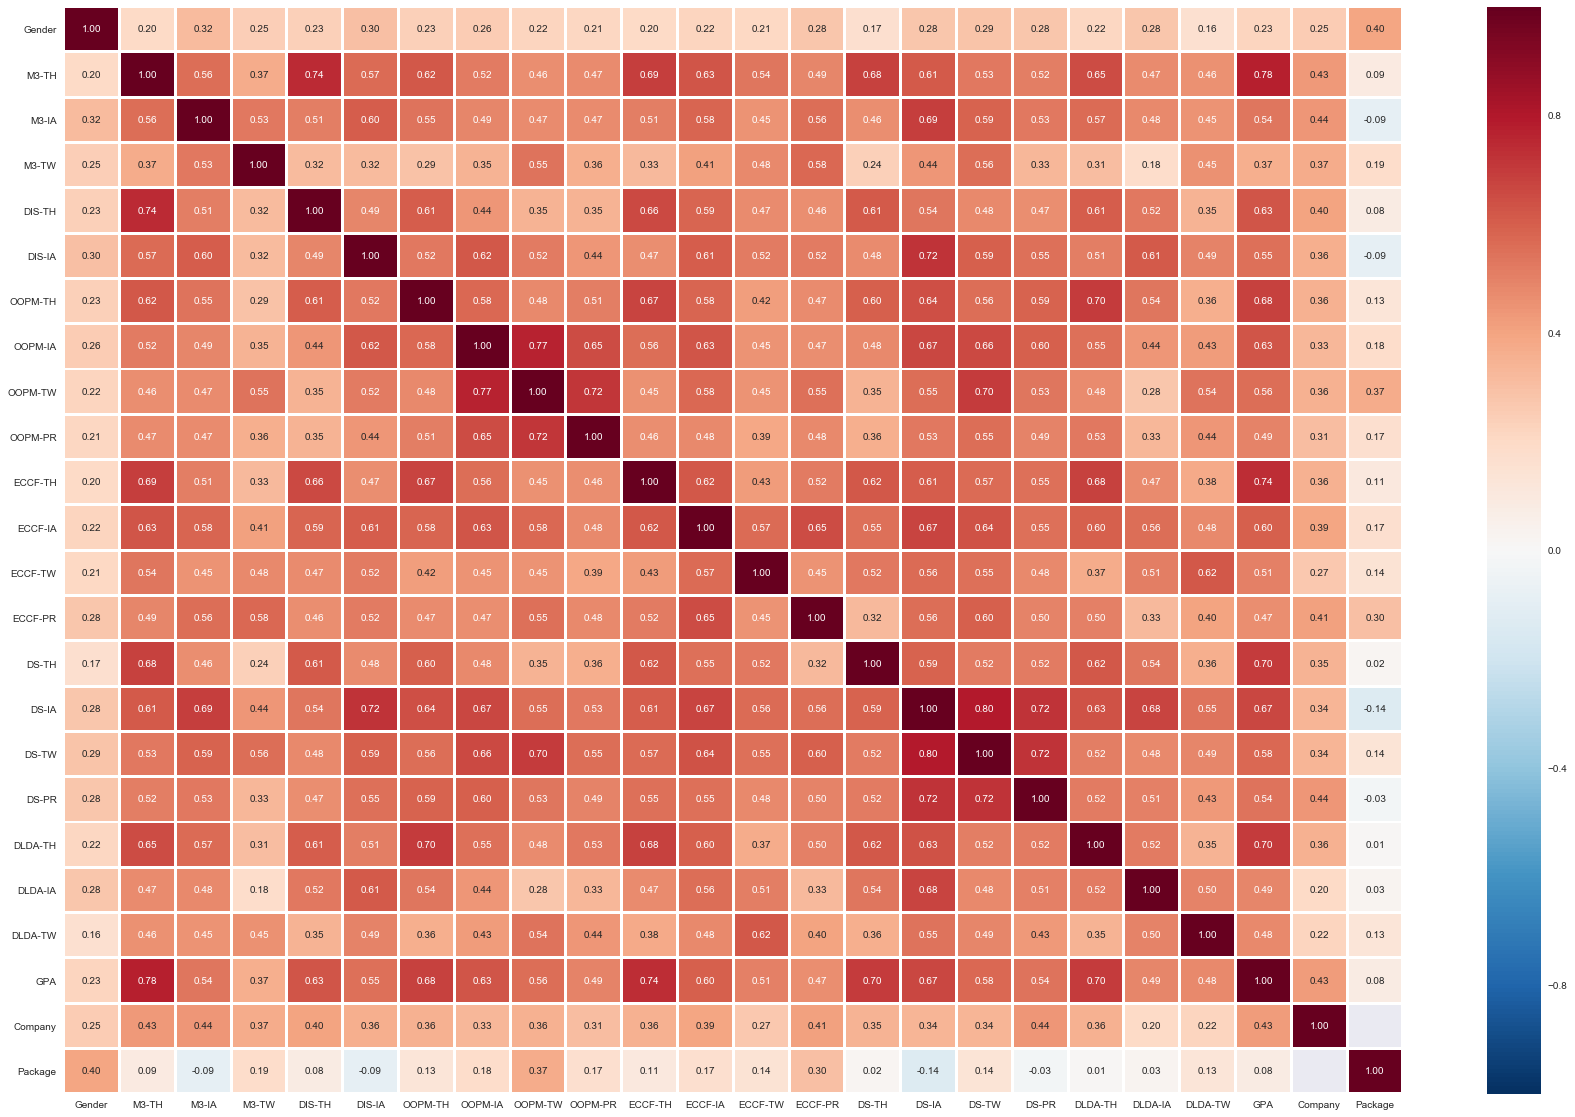

In [53]:
corr = sem3_2017_merge.corr()
plt.figure(figsize=(30,20)) #To adjust the size of graph
sns.heatmap(corr, linewidths=2, fmt=".2f", annot=True) #Use to show values in the boxes

## Insights from the above graph: 

<ol> 
<li> Gender has a no correaltion with any of the patameters </li>
<li><ol>**M3** - 

    <li> High correlation between M3 and DIS(0.74), ECCF(0.69), DS(0.68)
    <li> Of all subjects M3 has highest correaltion with GPA. 
    </ol>

<li> <ol>**DIS** - 
     <li> After M3 DIS shows highest correaltion with ECCF(0.66) 
     <li> Lowest correalation with GPA of all subjects.
     </ol>
</li>
    
     
<li><ol>**OOPM** - 
     <li> Highest correaltion with DLDA (0.70)
     <li> Does not contribute towards placements contrary to our expectations. 
     </ol>

<li> **ECCF** - Highest correaltion is with DLDA (0.68)
<li> Correaltion between Gender and Package (0.4) 


# Sem 4 Correlations

In [59]:
sem4_reduced = sem4.drop(['M4-IA', 'M4-TW', 'TCS-IA', 'AOA-IA', 'AOA-TW', 'AOA-PR', 'CG-IA', 'CG-TW', 'CG-PR', 'COA-IA', 'COA-TW', 'COA-PR', 'DBMS-IA', 'DBMS-TW','DBMS-PR'], axis=1)
sem4_2017_merge = pd.merge(sem4_reduced, company, how='left')
sem4_2017_merge['Company'].loc[~sem4_2017_merge['Company'].isnull()] = 1
sem4_2017_merge['Company'].loc[sem4_2017_merge['Company'].isnull()] = 0
sem4_2017_merge.head(2)

,Name,Gender,Sno,M4-TH,TCS-TH,AOA-TH,CG-TH,COA-TH,DBMS-TH,P/F,GPA,Company,Package
0,AGRE KIRAN SHASHIKANT,0,154201,61,61,61,58,58,63,P,9.29,1,350000.0
1,AGRAWAL CHANCHAL RAKESH,1,154202,18,58,58,59,50,46,F,0.00,0,NaN


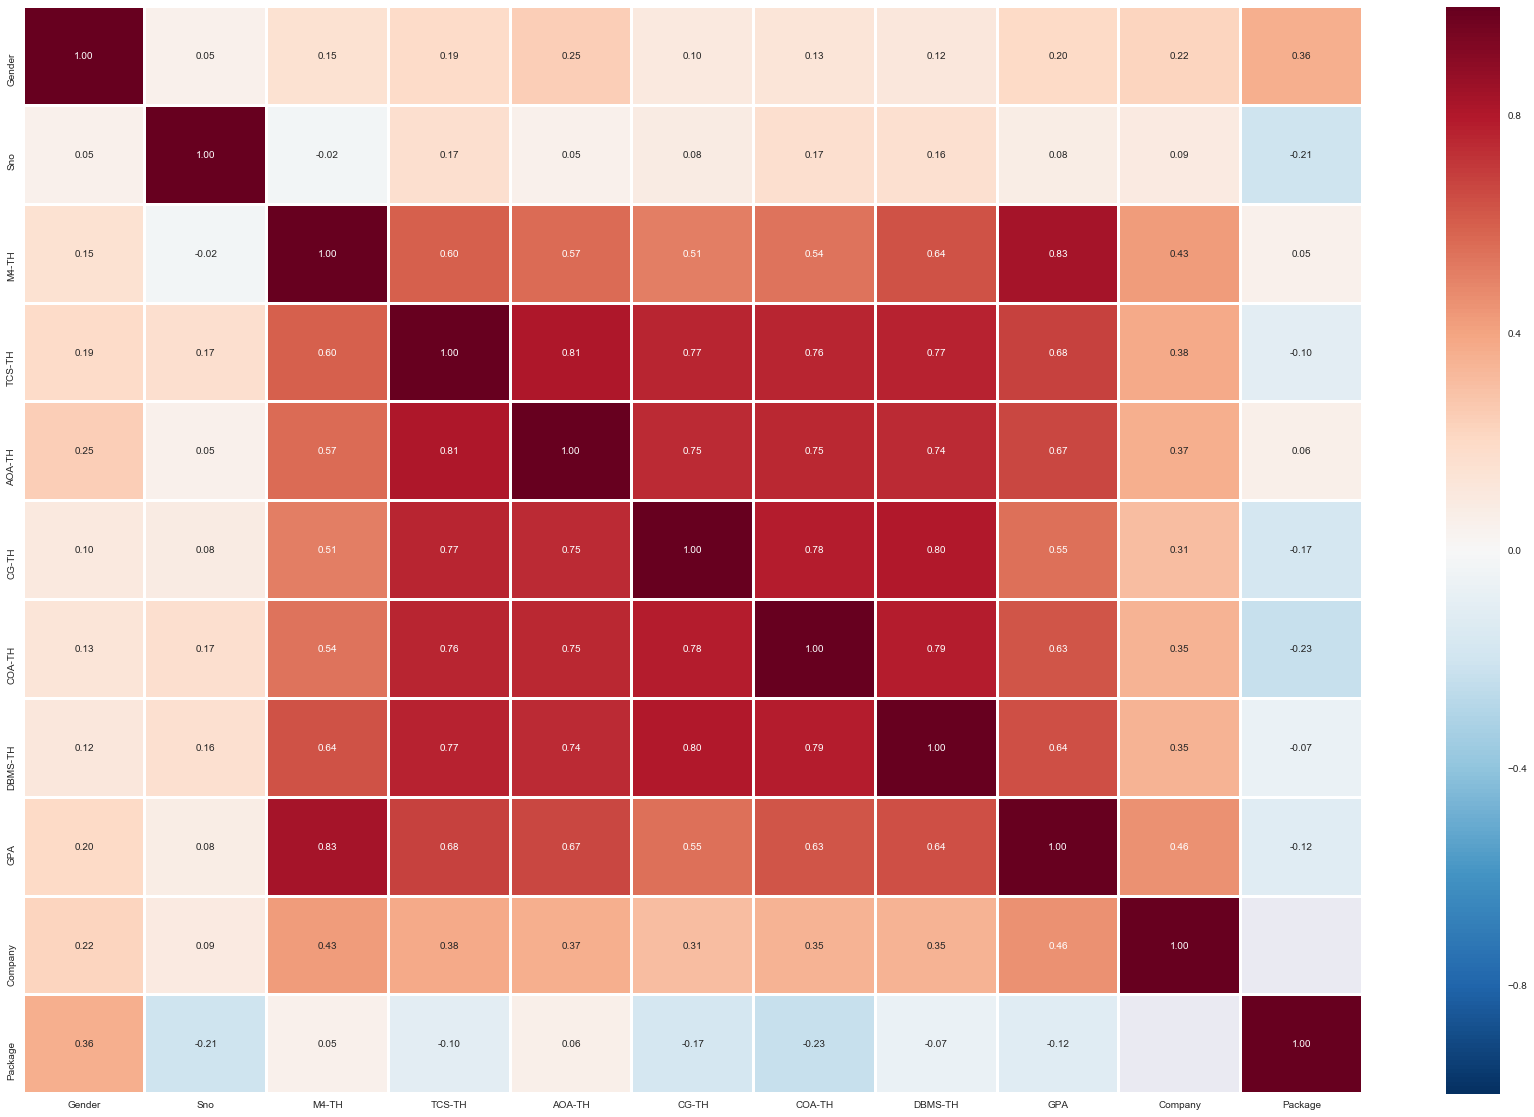

In [60]:
corr = sem4_2017_merge.corr()
plt.figure(figsize=(30,20)) #To adjust the size of graph
sns.heatmap(corr, linewidths=2, fmt=".2f", annot=True) #Use to show values in the boxes

## Insigths: 

<ol><li><b>M4</b><ul>
        <li> Highest contributor to the GPA and no significant correaltion with other subjects. 
        <li> Again maths has highest correaltion with company compared to other subjects. 
        </ul>
    <li><b>TCS</b> - Surprisingly highest correlation with AOA. 
    <li><b>AOA</b> - Contrary to our expectation AOA is not contributing much to the placements but it has highest correaltion with package. 
    <li><b>CG</b> - Highest correlation with DBMS. 
    <li><b>COA</b> - Almost equal correaltion with DBMS and CG. 
    <li>Comapny vs GPA correaltion - 0.46

# Sem 5 correaltions

In [61]:
sem5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 24 columns):
Name       157 non-null object
Gender     157 non-null int64
Sno        157 non-null object
MP-TH      157 non-null int64
MP-IA      157 non-null int64
MP-TW      157 non-null int64
MP-PR      157 non-null int64
WTL-TW     157 non-null int64
WTL-PR     157 non-null int64
OS-TH      157 non-null int64
OS-IA      157 non-null int64
OS-TW      157 non-null int64
OS-PR      157 non-null int64
BCE-TW     157 non-null int64
SOAD-TH    157 non-null int64
SOAD-IA    157 non-null int64
SOAD-TW    157 non-null int64
SOAD-PR    157 non-null int64
CN-TH      157 non-null int64
CN-IA      157 non-null int64
CN-TW      157 non-null int64
CN-PR      157 non-null int64
P/F        157 non-null object
GPA        157 non-null float64
dtypes: float64(1), int64(20), object(3)
memory usage: 29.5+ KB


In [62]:
sem5_reduced = sem5.drop(['Sno','MP-IA','MP-TW','MP-PR','OS-IA','OS-TW','SOAD-IA','SOAD-TW','SOAD-PR','CN-IA','CN-TW','CN-PR'], axis=1)
sem5_2017_merge = pd.merge(sem5_reduced, company, how='left')
sem5_2017_merge['Company'].loc[~sem5_2017_merge['Company'].isnull()] = 1
sem5_2017_merge['Company'].loc[sem5_2017_merge['Company'].isnull()] = 0
sem5_2017_merge.head(2)

,Name,Gender,MP-TH,WTL-TW,WTL-PR,OS-TH,OS-PR,BCE-TW,SOAD-TH,CN-TH,P/F,GPA,Company,Package
0,AGRAWAL CHANCHAL RAKESH,1,44,20,25,48,21,39,49,58,P,7.67,0,NaN
1,AGRE KIRAN SHASHIKANT,0,49,24,45,57,24,45,42,60,P,8.63,1,350000.0


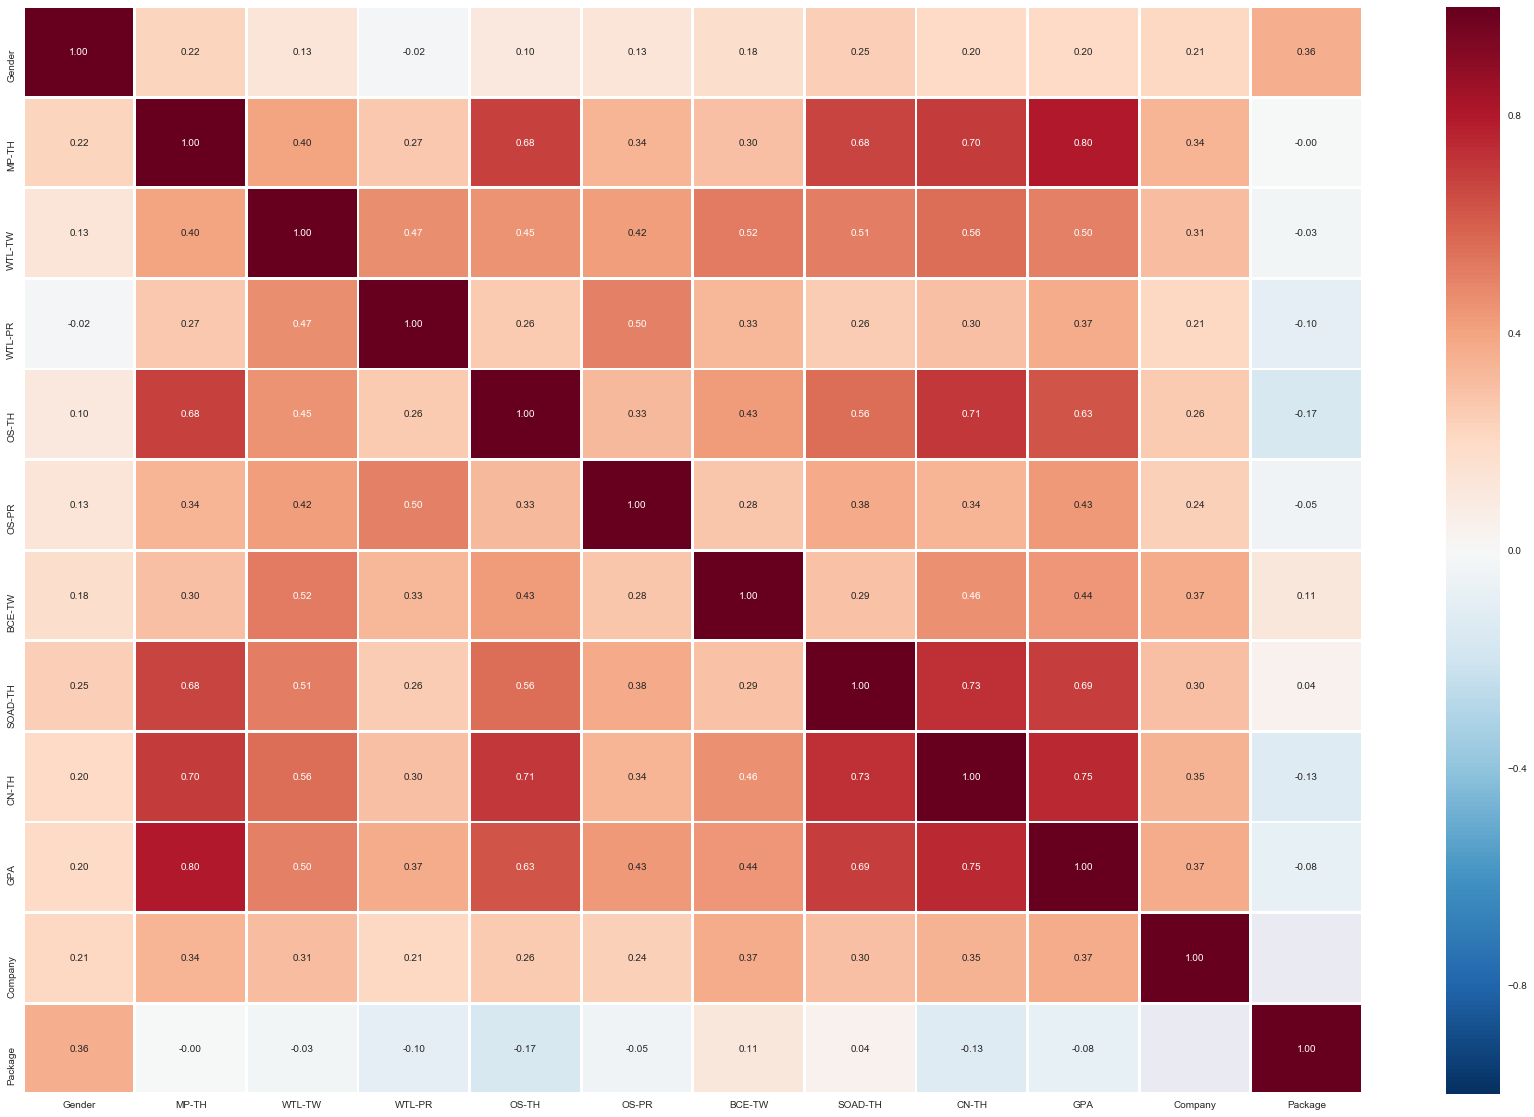

In [63]:
corr = sem5_2017_merge.corr()
plt.figure(figsize=(30,20)) #To adjust the size of graph
sns.heatmap(corr, linewidths=2, fmt=".2f", annot=True) #Use to show values in the boxes

## Insights: 

<ol><li><b>MP</b> - Highest contributor to the GPA and has almost equal correation with SOAD (0.68), CN (0.7), OS (0.68)
    <li><b>OS</b> - Highest correaltion with CN (0.71)
    <li><b>BCE</b> - Has highest correaltion with **package** which demonstrates importance of communication skills for the interview.
    <li><b>SOAD</b> - Highest correaltio with CN (0.73)
    <li><b>CN</b> - Subject which has high correaltion with most of the subjects. 
    

# Sem 6 Correlations

In [65]:
sem6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 24 columns):
Name       145 non-null object
Gender     120 non-null float64
Sno        145 non-null object
SPCC-TH    145 non-null int64
SPCC-IA    145 non-null int64
SPCC-TW    145 non-null int64
SPCC-PR    145 non-null int64
SE-TH      145 non-null int64
SE-IA      145 non-null int64
SE-TW      145 non-null int64
SE-PR      145 non-null int64
DD-TH      145 non-null int64
DD-IA      145 non-null int64
DD-TW      145 non-null int64
DD-PR      145 non-null int64
MCC-TH     145 non-null int64
MCC-IA     145 non-null int64
MCC-TW     145 non-null int64
MCC-PR     145 non-null int64
PM-TW      145 non-null int64
NP-TW      145 non-null int64
NP-PR      145 non-null int64
P/F        145 non-null object
GPA        145 non-null float64
dtypes: float64(2), int64(19), object(3)
memory usage: 27.3+ KB


In [68]:
sem6_reduced = sem6.drop(['Sno','SPCC-IA', 'SPCC-TW', 'SPCC-PR', 'SE-IA', 'SE-TW', 'SE-PR', 'DD-IA', 'DD-TW', 'DD-PR', 'MCC-IA', 'MCC-TW', 'MCC-PR'], axis=1)
sem6_2017_merge = pd.merge(sem6_reduced, company, how='left')
sem6_2017_merge['Company'].loc[~sem6_2017_merge['Company'].isnull()] = 1
sem6_2017_merge['Company'].loc[sem6_2017_merge['Company'].isnull()] = 0
sem6_2017_merge.head(2)

,Name,Gender,SPCC-TH,SE-TH,DD-TH,MCC-TH,PM-TW,NP-TW,NP-PR,P/F,GPA,Company,Package
0,ABHISHEK TICKOO,0.0,32,0,41,19,32,22,36,F,0.00,0,NaN
1,AGRAWAL CHANCHAL RAKESH,1.0,59,56,54,52,38,21,40,P,8.46,0,NaN


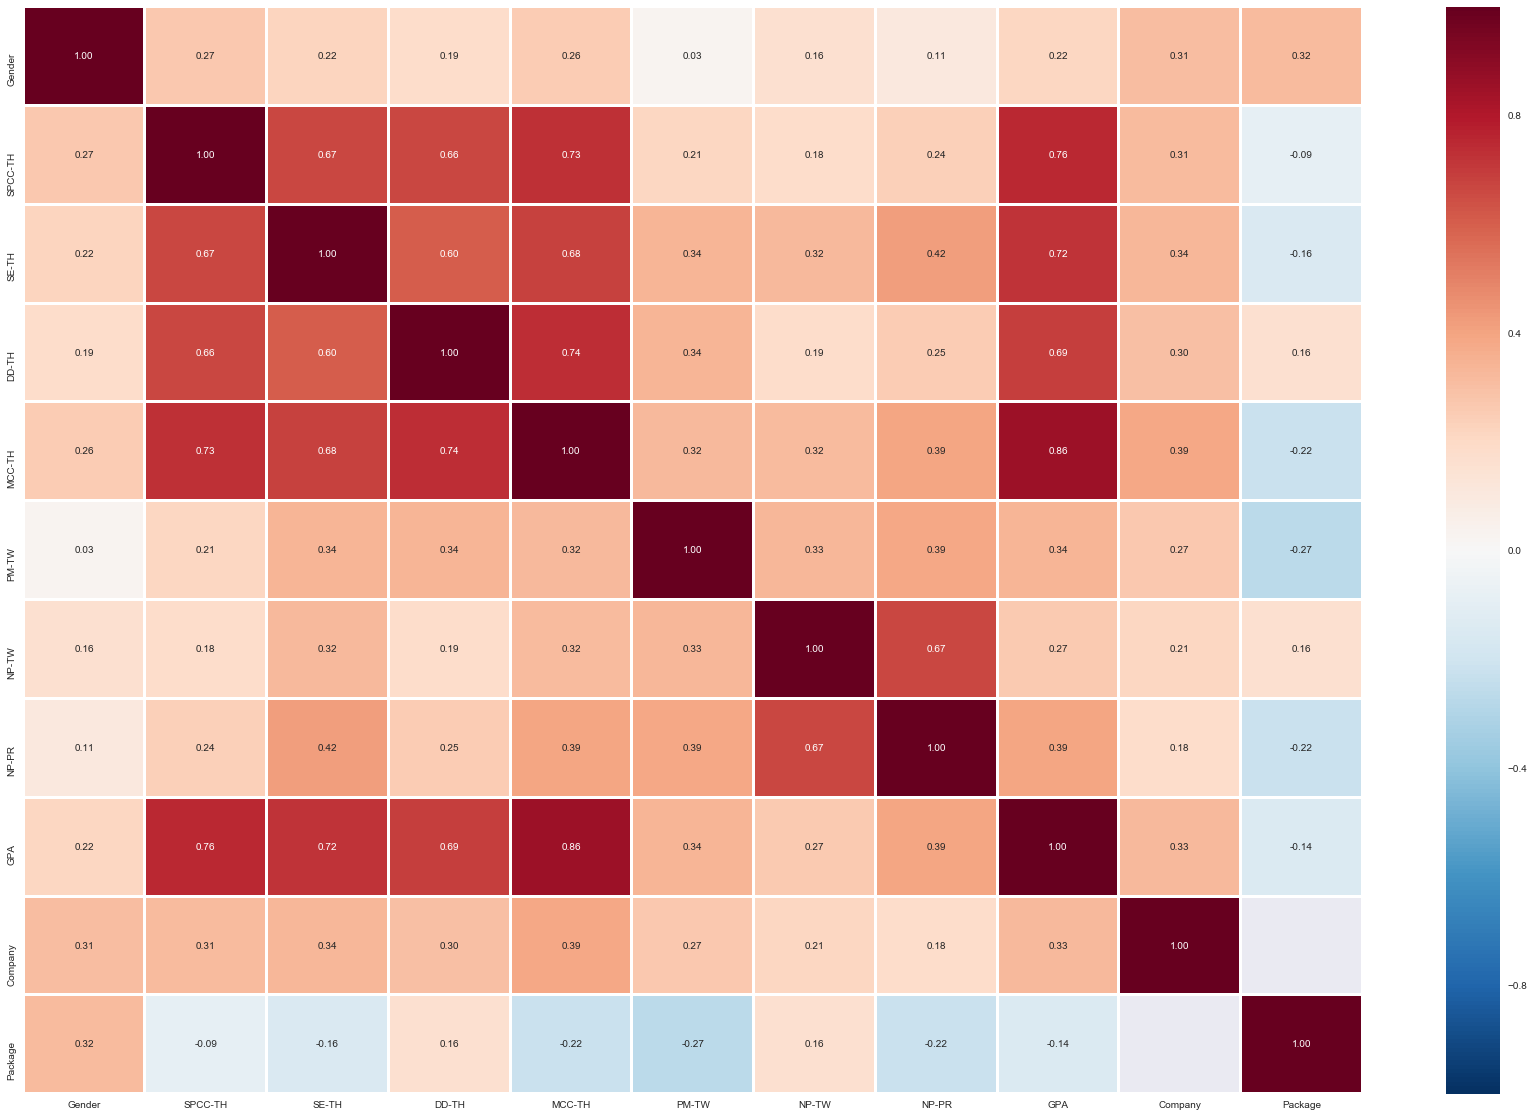

In [69]:
corr = sem6_2017_merge.corr()
plt.figure(figsize=(30,20)) #To adjust the size of graph
sns.heatmap(corr, linewidths=2, fmt=".2f", annot=True) #Use to show values in the boxes

## Insights: 

<ol><li><b>SPCC</b> - Highest correlation with MCC (0.73)
    <li><b>SE</b> - Almost equal correlation with MCC and SPCC (0.68)
    <li><b>MCC</b> - Highest contributor to the GPA and also highest correlation with placements compared to other subjects. 
    <li><b>Package</b> - DD and NP are two subjects having highest correlation with the package. 
    